In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [21]:
import numpy as np
import pandas as pd

In [22]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [94]:
# Python SQL toolkit and Object Relational Mapper (ORM)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, Table

# References will be to classes in your code instead of specific tables in the database
# & you can influence each class independently.

In [24]:
# Database Set-up
engine = create_engine("sqlite:///hawaii.sqlite")

# Set up the ability to query a SQLite database & prepares our file to be connected to our SQLite databas

In [25]:
# Reflect an existing database into a new model
# Transfer the contents of the database into a different structure of data
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# When we reflect tables, we create classes that help keep our code separate

In [26]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Alternate way: Get the name of the table. 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB, it allows us to query our database
session = Session(engine)

# Understanding the Climate Analysis Data (Gabby's Notes)

In [32]:
# Method 1: print out columns of tables
columns_measure = inspector.get_columns('measurement')
print(columns_measure)
print('---------------------------------------')
columns_station = inspector.get_columns('station')
print(columns_station)

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]
---------------------------------------
[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'latitude', 'type': FLOAT(), 'nullable': 

In [33]:
# Method 2: Print out the list of columns in Measurement
Base.classes.measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [18]:
# Print out the list of columns in Measurement
Base.classes.station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [46]:
# Query All Records in the the Database
data = engine.execute("SELECT * FROM measurement LIMIT 10;")
for row in data:
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [57]:
# Query All Records in the Database where temperature > 0 degrees
data_temp = engine.execute('SELECT * FROM measurement WHERE tobs > 0.0;')
temps = [data for data in data_temp]
len(temps)

19550

In [70]:
# Make a connection to the SQL database
conn = engine.connect()

# Query All Records in the the Database
measurement_data_df = pd.read_sql("SELECT * FROM measurement", conn)
len(measurement_data_df)

19550

In [77]:
# Print out how many lines there are 
print(session.query(Measurement).count())
session.query(Station).count()

19550


9

In [60]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9c6d87c130>,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [95]:
#  Create a meta data object to hold the reflected table schema
metadata = MetaData()

# Create a table object and use 'autoload' and 'autoload_with' to define the columns from the table. 
table = Table('station', metadata, autoload=True, autoload_with=engine)

# Get the column names using the 'keys()' method on the column object. 
table.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [71]:
# Query All Records in the the Station 
station_data_df = pd.read_sql("SELECT * FROM station", conn)
station_data_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [73]:
# Use the session to query Station table and display all rows
for row in session.query(Station.name, Station.elevation).all():
    print(row)

('WAIKIKI 717.2, HI US', 3.0)
('KANEOHE 838.1, HI US', 14.6)
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 7.0)
('PEARL CITY, HI US', 11.9)
('UPPER WAHIAWA 874.3, HI US', 306.6)
('WAIMANALO EXPERIMENTAL FARM, HI US', 19.5)
('WAIHEE 837.5, HI US', 32.9)
('HONOLULU OBSERVATORY 702.2, HI US', 0.9)
('MANOA LYON ARBO 785.2, HI US', 152.4)


# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

In [12]:
# Sort the dataframe by date
df = df.sort_index()

In [36]:
# print(df.to_string(index=False))

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

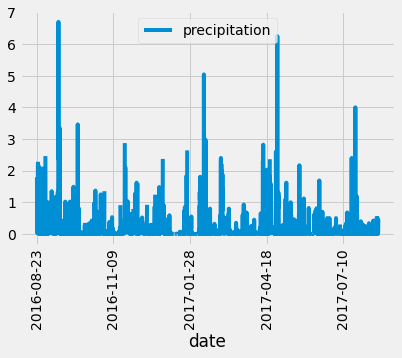

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation='vertical')

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [111]:
x = session.query(Station.station).all()
np.ravel(x)

array(['USC00519397', 'USC00513117', 'USC00514830', 'USC00517948',
       'USC00518838', 'USC00519523', 'USC00519281', 'USC00511918',
       'USC00516128'], dtype='<U11')

In [15]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for the most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [18]:
[(0.0, 9.64, 0.2123520923520915)]

[(0.0, 9.64, 0.2123520923520915)]

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

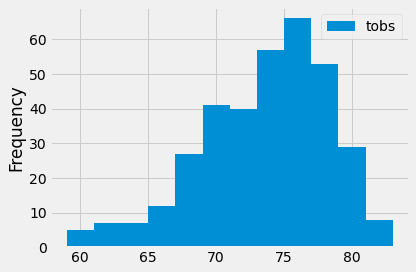

In [20]:
df_temp = pd.DataFrame(results,columns=['tobs'])
df_temp.plot.hist(bins=12)
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge